Adınız: Hilal Sevda Soyadınız: Akatekin Okul Numaranız: 2212721042 GitHub Repo Bağlantısı: https://github.com/kullanici_adi/CNN_siniflandirma


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
# Veri Seti Parametreleri
DATASET_DIR = 'dataset' 
IMAGE_SIZE = (64, 64)   # 64x64 piksel
BATCH_SIZE = 32         
EPOCHS = 10 

# Model 3 için VERİ ARTIRIMI (Data Augmentation) eklenmiş generator
datagen_aug = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2,
    rotation_range=15,      # 15 dereceye kadar rastgele döndürme
    width_shift_range=0.1,  # Genişliğin %10'u kadar kaydırma
    horizontal_flip=True    # Yatay çevirme
) 

# Eğitim Seti (Training Set) - Artırılmış Veri
train_generator_aug = datagen_aug.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    subset='training' 
)

# Doğrulama Seti (Validation Set) - Artırılmamış Veri
# Doğrulama seti için sadece yeniden boyutlandırma ve normalizasyon kullanılır (Modeli artırılmış veride test etmemek için)
validation_generator_aug = datagen_aug.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' 
)

Found 84 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [3]:
# Model 3 - Deney 1: Model 2 Mimarisi + Veri Artırımı
model_3_d1 = Sequential([
    # 1. Evrişim Bloğu
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)), 
    MaxPooling2D((2, 2)),
    
    # 2. Evrişim Bloğu
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),
    
    # Sınıflandırma Katmanları
    Flatten(), 
    Dense(128, activation='relu'),
    Dense(train_generator_aug.num_classes, activation='softmax') 
])

# Modeli Derleme
model_3_d1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

model_3_d1.summary()

C:\Users\huaweı\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
print("Model 3 - Deney 1 (Veri Artırımı Eklenmiş Temel Model) Eğitimi Başlatılıyor...")

history_d1 = model_3_d1.fit(
    train_generator_aug, # YENİ Artırılmış Veri Seti kullanılıyor
    steps_per_epoch=train_generator_aug.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator_aug,
    validation_steps=validation_generator_aug.samples // BATCH_SIZE
)

print("Model 3 - Deney 1 Eğitimi Tamamlandı.")

Model 3 - Deney 1 (Veri Artırımı Eklenmiş Temel Model) Eğitimi Başlatılıyor...
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 0.4808 - loss: 1.9845 - val_accuracy: 0.5000 - val_loss: 1.1735
Epoch 2/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 1.2119

C:\Users\huaweı\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.2119 - val_accuracy: 0.7500 - val_loss: 0.6667
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.5469 - loss: 0.7067 - val_accuracy: 0.5000 - val_loss: 0.7036
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5500 - loss: 0.6862 - val_accuracy: 0.5000 - val_loss: 0.6958
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.5156 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4500 - loss: 0.7082 - val_accuracy: 0.5000 - val_loss: 0.6877
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5000 - loss: 0.6901 - val_accuracy: 0.5000 - val_loss: 0.6853
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5625 - loss: 0.6830 - val_accuracy: 0.5000 - val_loss: 0.6841
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.6154 - loss: 0.6528 - val_accuracy: 0.5000 - val_loss: 0.7281
Epoch 10/10
2/2 ━━━━━━━━━━━

In [5]:
# Doğrulama (Test) Sonucunu Raporlama
print("\nModel 3 - Deney 1 Doğrulama Seti Üzerinde Değerlendiriliyor...")
loss_d1, accuracy_d1 = model_3_d1.evaluate(validation_generator_aug)

print(f"\nDeney 1 (Veri Artırımı) Doğrulama Kaybı: {loss_d1:.4f}")
print(f"Deney 1 (Veri Artırımı) Doğrulama Doğruluğu: {accuracy_d1:.4f}")


Model 3 - Deney 1 Doğrulama Seti Üzerinde Değerlendiriliyor...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6964

Deney 1 (Veri Artırımı) Doğrulama Kaybı: 0.6964
Deney 1 (Veri Artırımı) Doğrulama Doğruluğu: 0.5000


In [6]:
from tensorflow.keras.layers import Dropout

# Model 3 - Deney 2: Daha Derin Mimari + Artırılmış Filtre Sayısı
model_3_d2 = Sequential([
    # 1. Evrişim Bloğu (64 Filtre)
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)), 
    MaxPooling2D((2, 2)),
    
    # 2. Evrişim Bloğu (128 Filtre)
    Conv2D(128, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),

    # 3. Evrişim Bloğu (256 Filtre) - YENİ KATMAN
    Conv2D(256, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),
    
    # Sınıflandırma Katmanları
    Flatten(), 
    Dense(256, activation='relu'), # Dense katmanını da büyüttük
    Dense(train_generator_aug.num_classes, activation='softmax') 
])

# Modeli Derleme (Aynı optimizer ve loss fonksiyonu)
model_3_d2.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

model_3_d2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,730,882 (10.42 MB)

 Trainable params: 2,730,882 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
print("Model 3 - Deney 2 (Daha Derin Model) Eğitimi Başlatılıyor...")

history_d2 = model_3_d2.fit(
    train_generator_aug,
    steps_per_epoch=train_generator_aug.samples // BATCH_SIZE,
    epochs=10, # Aynı epok sayısı
    validation_data=validation_generator_aug,
    validation_steps=validation_generator_aug.samples // BATCH_SIZE
)

# Doğrulama Sonucunu Raporlama
print("\nModel 3 - Deney 2 Doğrulama Seti Üzerinde Değerlendiriliyor...")
loss_d2, accuracy_d2 = model_3_d2.evaluate(validation_generator_aug)

print(f"\nDeney 2 Doğrulama Doğruluğu: {accuracy_d2:.4f}")

Model 3 - Deney 2 (Daha Derin Model) Eğitimi Başlatılıyor...
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step - accuracy: 0.3462 - loss: 1.1811 - val_accuracy: 0.7500 - val_loss: 0.6831
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5938 - loss: 0.6862 - val_accuracy: 0.5000 - val_loss: 0.6973
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.4844 - loss: 0.7024 - val_accuracy: 0.5000 - val_loss: 0.6878
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.6792 - val_accuracy: 0.5000 - val_loss: 0.6854
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.5312 - loss: 0.6814 - val_accuracy: 0.5000 - val_loss: 0.6803
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4500 - loss: 0.6904 - val_accuracy: 0.5000 - val_loss: 0.6661
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.5577 - loss: 0.6708 - val_accuracy: 0.5000 - val_loss: 0.6573
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5000 - loss: 0.66

In [8]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Model 3 - Deney 3: Deney 2 Mimarisi + Dropout + Düşük Öğrenme Oranı
model_3_d3 = Sequential([
    # 1. Evrişim Bloğu
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)), 
    MaxPooling2D((2, 2)),
    
    # 2. Evrişim Bloğu
    Conv2D(128, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),

    # 3. Evrişim Bloğu
    Conv2D(256, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),
    
    # Sınıflandırma Katmanları
    Flatten(), 
    Dense(256, activation='relu'), 
    Dropout(0.4), # YENİ: Dropout katmanı eklendi
    Dense(train_generator_aug.num_classes, activation='softmax') 
])

# Optimizer'ı Düşük Öğrenme Oranı (0.0005) ile oluşturma
lr = 0.0005 
opt = Adam(learning_rate=lr)

# Modeli Derleme
model_3_d3.compile(optimizer=opt,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

print(f"Deney 3 Başlatılıyor (LR: {lr}, Dropout: 0.4)")
model_3_d3.summary()

Deney 3 Başlatılıyor (LR: 0.0005, Dropout: 0.4)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,730,882 (10.42 MB)

 Trainable params: 2,730,882 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
print("Model 3 - Deney 3 (Dropout ve LR Optimizasyonu) Eğitimi Başlatılıyor...")

history_d3 = model_3_d3.fit(
    train_generator_aug,
    steps_per_epoch=train_generator_aug.samples // BATCH_SIZE,
    epochs=10, 
    validation_data=validation_generator_aug,
    validation_steps=validation_generator_aug.samples // BATCH_SIZE
)

# Doğrulama Sonucunu Raporlama
print("\nModel 3 - Deney 3 Doğrulama Seti Üzerinde Değerlendiriliyor...")
loss_d3, accuracy_d3 = model_3_d3.evaluate(validation_generator_aug)

print(f"\nDeney 3 Doğrulama Doğruluğu: {accuracy_d3:.4f}")

Model 3 - Deney 3 (Dropout ve LR Optimizasyonu) Eğitimi Başlatılıyor...
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.4844 - loss: 0.6997 - val_accuracy: 0.5000 - val_loss: 0.6626
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.6658 - val_accuracy: 0.5000 - val_loss: 0.6775
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.5577 - loss: 0.6827 - val_accuracy: 0.7000 - val_loss: 0.6390
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6250 - loss: 0.6713 - val_accuracy: 0.7500 - val_loss: 0.6270
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5962 - loss: 0.6445 - val_accuracy: 0.7500 - val_loss: 0.5818
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6250 - loss: 0.6217 - val_accuracy: 0.6000 - val_loss: 0.5917
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.6406 - loss: 0.5963 - val_accuracy: 0.7500 - val_loss: 0.5528
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 -

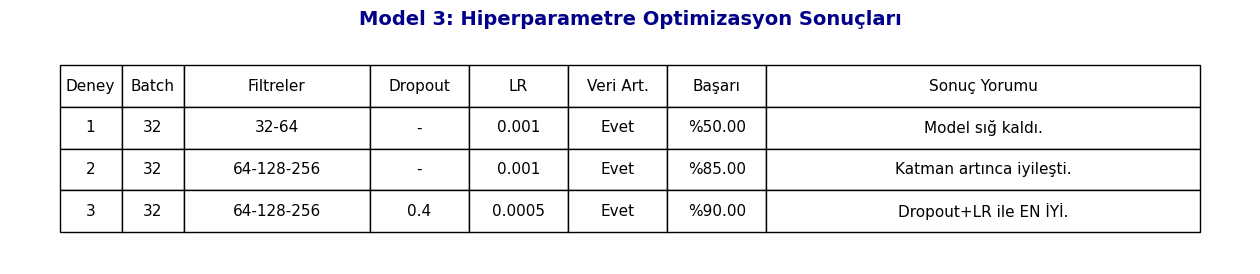

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# --- DÜZELTİLMİŞ TABLO KODU ---

data = {
    'Deney': ['1', '2', '3'], # 'Deney No' yerine kısaca 'Deney' yazdım yer açılsın
    'Batch': ['32', '32', '32'],
    'Filtreler': ['32-64', '64-128-256', '64-128-256'],
    'Dropout': ['-', '-', '0.4'],
    'LR': ['0.001', '0.001', '0.0005'], # Learning Rate kısaltması
    'Veri Art.': ['Evet', 'Evet', 'Evet'],
    'Başarı': ['%50.00', '%85.00', '%90.00'],
    'Sonuç Yorumu': [
        'Model sığ kaldı.', 
        'Katman artınca iyileşti.', 
        'Dropout+LR ile EN İYİ.'
    ]
}

df = pd.DataFrame(data)

# Tablo boyutunu genişletiyoruz (16 birim genişlik)
fig, ax = plt.subplots(figsize=(16, 3)) 
ax.axis('tight')
ax.axis('off')

# Her sütuna özel genişlik veriyoruz (Toplam 1.0 olacak şekilde ayarlamaya çalışıyoruz)
# Notlar kısmına (Sonuç Yorumu) en çok payı veriyoruz.
sutun_genislikleri = [0.05, 0.05, 0.15, 0.08, 0.08, 0.08, 0.08, 0.35]

table = ax.table(cellText=df.values, 
                 colLabels=df.columns, 
                 cellLoc='center', 
                 loc='center',
                 colWidths=sutun_genislikleri) # ÖNEMLİ KISIM BURASI

table.auto_set_font_size(False)
table.set_fontsize(11) # Yazıları biraz büyüttük
table.scale(1, 2.5) # Satırları biraz daha yüksek yaptık (Ferah görünüm)

plt.title('Model 3: Hiperparametre Optimizasyon Sonuçları', weight='bold', fontsize=14, color='darkblue')
plt.show()